# Topic Model Trends

In this notebook we visualize a previously generated topic model.

# Set Up

## Imports

In [1]:
import pandas as pd
import numpy as np

## Configuration

In [2]:
data_prefix = 'jstor_hyperparameter'
db_dir = './db'

In [3]:
data_prefix

'jstor_hyperparameter'

## Import Topic Data

We import our previously generated model.

In [4]:
topic_model_suffix = '_NMF'
# topic_model_suffix = ''

In [5]:
LABELS = pd.read_csv(f"{db_dir}/{data_prefix}-LABELS.csv").set_index('doc_id')
VOCAB = pd.read_csv(f"{db_dir}/{data_prefix}-VOCAB.csv").set_index('term_str')
BOW = pd.read_csv(f"{db_dir}/{data_prefix}-BOW.csv").set_index(['doc_id','term_str'])
TOPICS = pd.read_csv(f"{db_dir}/{data_prefix}-TOPICS{topic_model_suffix}.csv").set_index('topic_id')
THETA = pd.read_csv(f"{db_dir}/{data_prefix}-THETA{topic_model_suffix}.csv").set_index('doc_id')
THETA.columns.name = 'topic_id'
THETA.columns = [int(col) for col in THETA.columns] # Should change columns to strings
PHI = pd.read_csv(f"{db_dir}/{data_prefix}-PHI{topic_model_suffix}.csv").set_index('topic_id')
PHI.columns.name = 'term_str'

In [6]:
n_topics = len(TOPICS)
topic_cols = [t for t in range(n_topics)]

# Inspect Results

In [7]:
THETA['label'] = LABELS['doc_year']

In [8]:
TRENDS = THETA.groupby('label').mean()

In [9]:
TRENDS.T.style.background_gradient()

label,1969,1972,1973,1974,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0.014073,0.059407,0.027742,0.038775,0.025872,0.042075,0.036793,0.036184,0.035120,0.049266,0.057976,0.035748,0.053686,0.049566,0.020766,0.037448,0.043141,0.040872,0.043116,0.046216,0.054327,0.047451,0.044128,0.050845,0.050796,0.045100,0.045674,0.054678,0.058697,0.052053,0.057362,0.053728,0.053284,0.051433,0.053937,0.054105,0.045666,0.051176,0.053750,0.053950,0.051874,0.056612,0.056720,0.050428,0.046029
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029421,0.115099,0.033474,0.034176,0.000000,0.027901,0.020479,0.000000,0.011795,0.000000,0.019689,0.039291,0.007310,0.008943,0.011217,0.027489,0.018938,0.005631,0.006816,0.006404,0.007313,0.030185,0.029433,0.006686,0.005876,0.000000,0.000024,0.003464,0.003375,0.000000,0.009255
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000586,0.000000,0.004826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003417,0.005667,0.000000,0.000000,0.001120,0.005502,0.002669,0.009228,0.006808,0.028138,0.008416,0.019794,0.031889,0.016589,0.025636,0.011854,0.021949,0.019462,0.022245,0.022782,0.014386,0.016497,0.017215,0.013544,0.008201,0.014242,0.011958,0.010790,0.008346,0.006944,0.007664
3,0.000000,0.000000,0.088297,0.003789,0.060340,0.026708,0.074521,0.078798,0.002295,0.039286,0.002687,0.050837,0.000212,0.000000,0.013605,0.013062,0.026772,0.030286,0.031904,0.011980,0.014248,0.032608,0.028564,0.011513,0.020697,0.017177,0.034098,0.010855,0.021620,0.015207,0.015084,0.012871,0.004802,0.012571,0.009722,0.009223,0.013383,0.006686,0.005596,0.009654,0.010711,0.007634,0.009571,0.006466,0.003255
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001023,0.000000,0.000000,0.015736,0.019122,0.000000,0.000000,0.000974,0.011422,0.002399,0.000243,0.000036,0.007098,0.001525,0.001699,0.006071,0.002597,0.000141,0.009215,0.000569,0.000000,0.000740,0.007761,0.006563,0.004887,0.014127,0.014904,0.003665,0.009592,0.013302,0.012675,0.006236,0.002269,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005051,0.000000,0.003477,0.000000,0.000550,0.000000,0.000000,0.000000,0.004805,0.017924,0.000000,0.001393,0.019195,0.018021,0.000058,0.004267,0.014089,0.003893,0.013143,0.012075,0.008279,0.009438,0.009427,0.009577,0.013278,0.003665,0.007252,0.015370,0.007260,0.009132,0.005271,0.003241,0.009414,0.006307,0.006487,0.003631,0.005746,0.000052
6,0.000000,0.005211,0.000000,0.000000,0.002203,0.000240,0.044416,0.019726,0.000000,0.000000,0.000000,0.002503,0.000000,0.002659,0.003071,0.000000,0.001643,0.000000,0.000000,0.000618,0.005308,0.000295,0.002961,0.003082,0.004204,0.007390,0.001110,0.001809,0.006527,0.012082,0.002219,0.006410,0.003631,0.015492,0.017594,0.008240,0.010166,0.007128,0.008648,0.004892,0.008528,0.010880,0.007994,0.007636,0.020814
7,0.223419,0.000000,0.008352,0.019652,0.028697,0.000000,0.000780,0.000000,0.030020,0.010247,0.000000,0.007359,0.000000,0.023953,0.058413,0.001551,0.039529,0.006792,0.026922,0.027074,0.030932,0.006005,0.004288,0.003930,0.016807,0.034915,0.009253,0.010073,0.008054,0.001643,0.004964,0.002891,0.006434,0.007511,0.007605,0.004990,0.007568,0.005916,0.006056,0.004046,0.003270,0.005225,0.004112,0.006211,0.006585
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001753,0.000000,0.003725,0.000000,0.000000,0.000000,0.000000,0.000000,0.002650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000173,0.002181,0.000683,0.000000,0.001814,0.001654,0.000075,0.008068,0.005351,0.003106,0.003989,0.000807,0.008492,0.007096,0.008387,0.004444,0.013951,0.013335,0.009885,0.008406,0.010903,0.042592
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [10]:
def show_trend(topic_id, kind='bar', h=3, w=12):
    global THETA, TOPICS
    TRENDS[topic_id].plot(kind=kind, figsize=(w, h), rot=45, title=TOPICS.loc[topic_id].topwords);

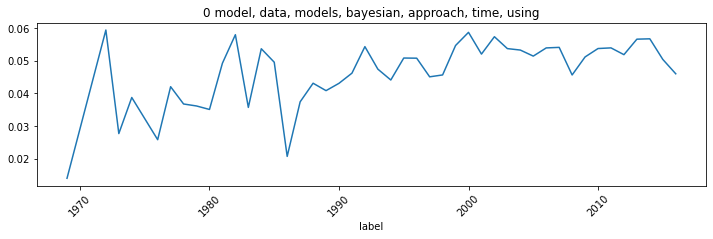

In [11]:
show_trend(0,'line')

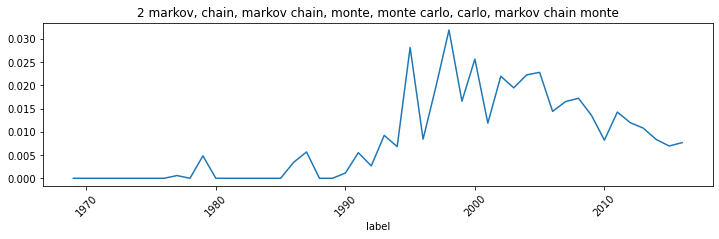

In [12]:
show_trend(2,'line')

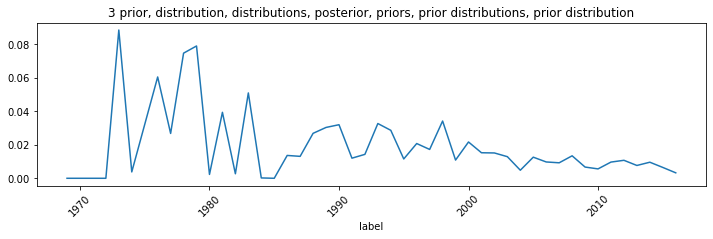

In [13]:
show_trend(3,'line')

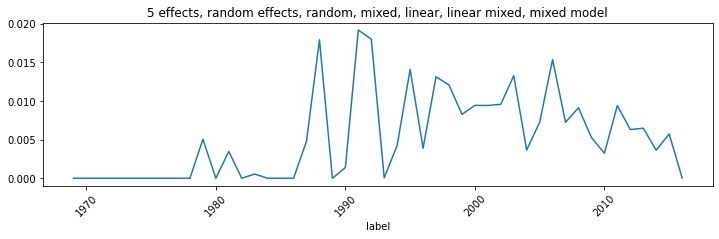

In [14]:
show_trend(5,'line')

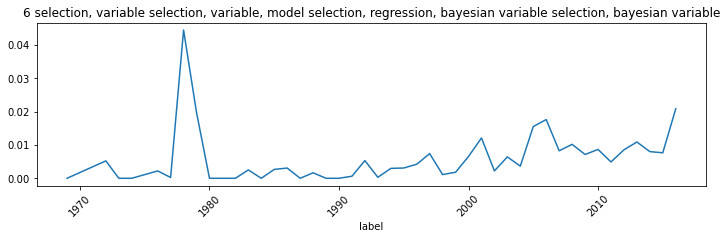

In [15]:
show_trend(6,'line')

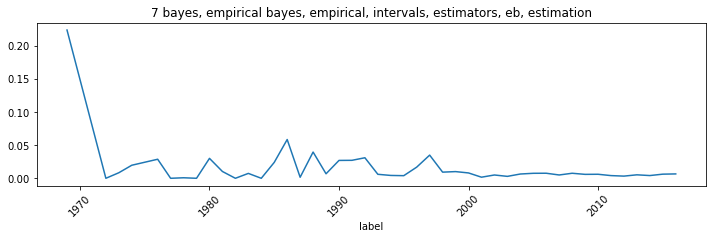

In [16]:
show_trend(7,'line')

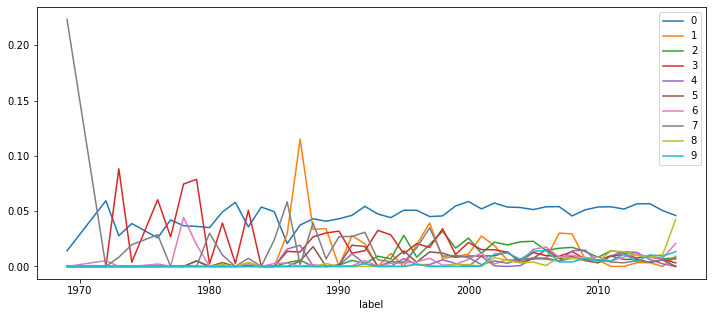

In [17]:
TRENDS.plot(figsize=(12, 5));

In [18]:
TOPICS.topwords.to_list()

['0 model, data, models, bayesian, approach, time, using',
 '1 des, les, la, et, une, pour, le',
 '2 markov, chain, markov chain, monte, monte carlo, carlo, markov chain monte',
 '3 prior, distribution, distributions, posterior, priors, prior distributions, prior distribution',
 '4 inflation, policy, monetary, monetary policy, shocks, forecasts, rate',
 '5 effects, random effects, random, mixed, linear, linear mixed, mixed model',
 '6 selection, variable selection, variable, model selection, regression, bayesian variable selection, bayesian variable',
 '7 bayes, empirical bayes, empirical, intervals, estimators, eb, estimation',
 '8 species, tree, population, abundance, growth, climate, forest',
 '9 expression, gene, genes, gene expression, microarray, differentially expressed, differentially']

In [22]:
THETA.iloc[:,:-1].sum(1)

doc_id
0       0.272023
1       0.306774
2       0.093155
3       0.077234
4       0.073977
          ...   
1401    0.091599
1402    0.119546
1403    0.317867
1404    0.071994
1405    0.115150
Length: 1406, dtype: float64